Aluno: Pedro Siade Ferreira

Matricula: 202004734

Parte 2

In [22]:
%matplotlib inline
import cv2 # importa opencv
import numpy as np # importa numpy
import matplotlib.pyplot as plt
import math
import sys

In [23]:

def filtroTamanhoArbitrario(img, filtro):
  M, N = img.shape
  s = 1 / np.sum(filtro) #suma dos coeficientes da matriz do filtro a fim de normalizar a mesma
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum * s)
      if q < 0:
         q = 0
      elif q > 255:
         q = 255
      imgFiltrada[u, v] = q
  return imgFiltrada

In [24]:

def filtro_mediana(img):
    M, N = img.shape
    filtro = np.ones((3,3))
    K = int(math.floor(len(filtro[0]) / 2))
    L = int(math.floor(len(filtro) / 2))
    imgFiltrada = img.copy() 
    for v in range(L, N - L):
        for u in range(K, M - K):             
            auxMediana = []
            for j in range(-L, L+1):           
                for i in range(-K, K+1):          
                    p = img[u+i, v+j]             
                    auxMediana.append(p) #adiciona no vetor auxiliar
            auxMediana.sort() #ordena o mesmo
            imgFiltrada[u, v] = np.median(auxMediana) #seleciona o elemento central
    return imgFiltrada

In [25]:
imagem = cv2.imread('Imagens/Fig0334(a)(hubble-original).tif', cv2.IMREAD_GRAYSCALE)
filtro =np.ones((15,15))
imgFiltrada = filtroTamanhoArbitrario(imagem,filtro)


Figura 3.14b - obtendo mesmos resultados:

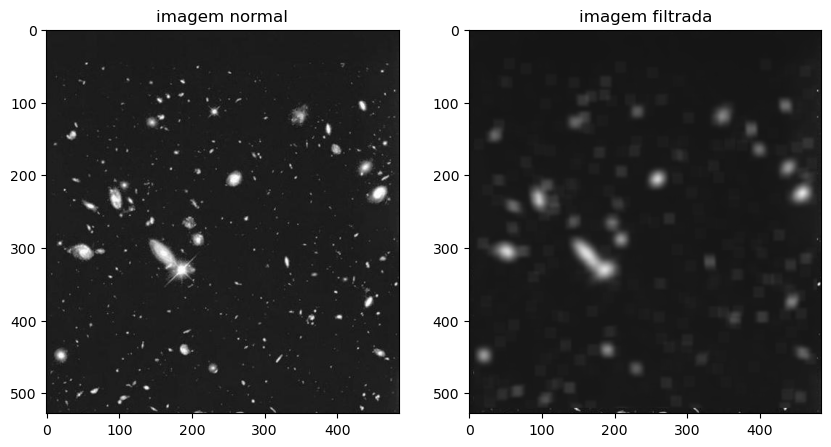

In [26]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title('imagem normal')
plt.imshow(imagem, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('imagem filtrada')
plt.imshow(imgFiltrada, cmap='gray')

Para obter o mesmo resultado da figura 3.14(b) foi feito um filtro de média com resolução 15X15 como na legenda da imagem. Percebe-se que como no livro é possível visualizar o embaçamento da imagem, caracteristíca de filtros lineares.

In [27]:
imagem = cv2.imread('Imagens/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)
filtro =np.ones((3,3))
imgFiltrada = filtroTamanhoArbitrario(imagem,filtro)

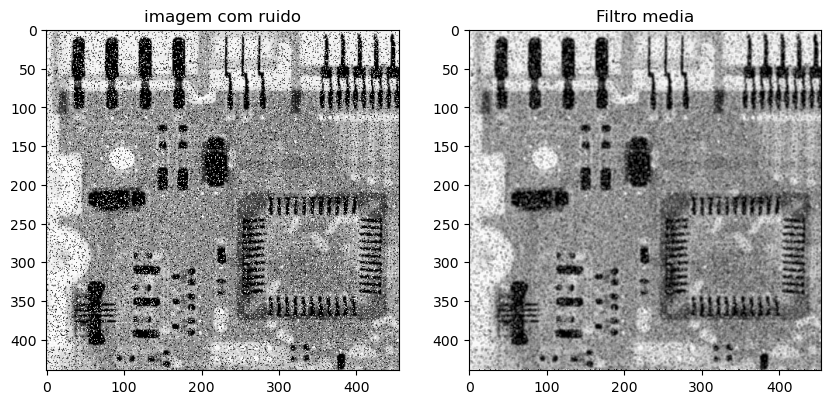

In [28]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title('imagem com ruido')
plt.imshow(imagem, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Filtro media')
plt.imshow(imgFiltrada, cmap='gray')

In [29]:
imgFiltrada2 = filtro_mediana(imagem)


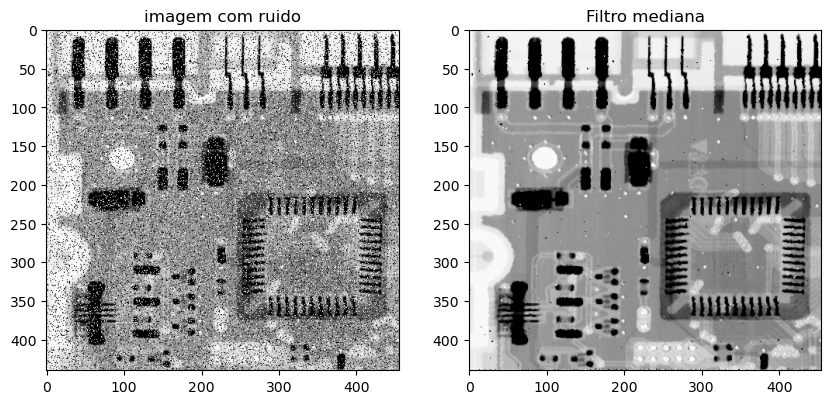

In [30]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title('imagem com ruido')
plt.imshow(imagem, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Filtro mediana')
plt.imshow(imgFiltrada2, cmap='gray')

Com os resultados acima é possível perceber que o filtro de média não foi eficaz para retirar os ruídos sal e pimenta, como também a imagem tornou-se menos nítida evidenciando o fato já estudado de que filtros lineares não são adequados para retirar ruídos, nem para melhorar uma imagem(maioria dos casos), pois borram as bordas(linearidade) e as linhas estreitas(alongamento e diminuição do pico).

No entanto no segundo exemplo, é possível perceber que aplicando-se um filtro de mediana, um filtro não linear, o qual cada pixel da matriz é percorrido por um kernel 3x3 e escolhe-se a mediana do mesmo, o resultado é muito positivo, sendo eliminado todos os ruídos, além de que a imagem continua nítida. 
O precesso é o mesmo dos outros filtros já estudado, contudo ordena-se os pixels da vizinhança do pivo e escolhe o elemento central, ou seja o numero do meio do intervalo.
Assim sendo, por conta de sempre escolher o elemento central evita-se saturação e ruídos, haja vista que nunca será escolhido os extremos para a nova imagem, por conseguinte as interpéries são eliminadas.


Filtro não lineares, como visto, não diminuem a nitidez da imagem, isso se deve apo fato de que as bordas e rampas continuam sendo representados, acontecendo apenas um deslocamento dos mesmos. Logo, percebe-se que diferentemente dos filtros lineares não há uma suavização da imagem, contudo os pulsos estreitos, os quais seriam os ruídos, são eliminados por conta da novo pixel ser a mediana de um conglomerado de pixel.

Outras explicações na parte 1 sobre filtro de media e mediana.

Extra: Assunto não abordado no teste:(por mim)
Por conta do filtro não percorrer alguns pixel da borda da imagem, surge uma parte na borda a qual não é aplicado o filtro, sendo mais visível para filtros de dimensões maiores:


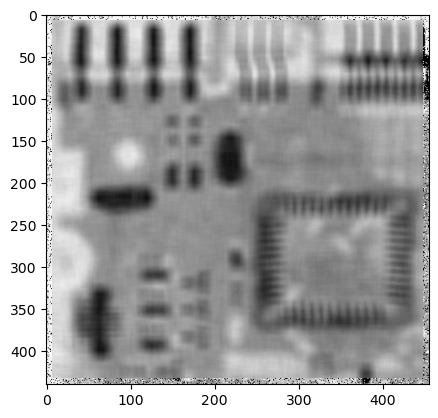

In [31]:
filtro =np.ones((15,15))
imgFiltrada = filtroTamanhoArbitrario(imagem,filtro)
plt.imshow(imgFiltrada, cmap='gray')

Na imagem acima é possível notar a falta de nitidez quando um filtro linear de grande dimensão é aplicado em uma imagem, além disso é possível notar que há uma parte na borda que o filtro não é aplicado.
Isso se deve ao fato de que nois dois primeiros laços de repetição(for), o intervalo começa(L,k) e termina(N-L, M-K) referente a metade das dimensões do filtro, portanto há uma parte da imagem a qual o mesmo não é aplicado. Isso se deve ao fato de não ser possível extrapolar os limites da matriz, pois estaria invadindo um espaço na memória não destinado ao armazenamento da imagem.
Para corrigir o problema citado há algumas alternativas, como: cortar ou utilizar um padding.


Cortar a mesma seria desconsiderar o pedaço o qual o filtro não foi aplicado, portanto a nova imagem teria uma nova dimensão.
Padding seria preencher com zero, ou seja preto, a area a qual o filtro não pode ser aplicado, cobrindo assim toda imagem.


In [32]:
def filtroTamanhoArbitrarioPadding(img, filtro):
  M, N = img.shape
  s = 1 / np.sum(filtro) #suma dos coeficientes da matriz do filtro a fim de normalizar a mesma
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  for v in range(0, N):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(0, M):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          if u+i<=0 or v+j<=0:
            p=0
          elif v+j>N-1 or u+i>M-1:
            p=0
          else:
            p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum * s)
      if q < 0:
         q = 0
      elif q > 255:
         q = 255
      imgFiltrada[u, v] = q
  return imgFiltrada

In [33]:
imagem = cv2.imread('Imagens/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)
filtro =np.ones((10,10))
imgFiltrada = filtroTamanhoArbitrarioPadding(imagem,filtro)

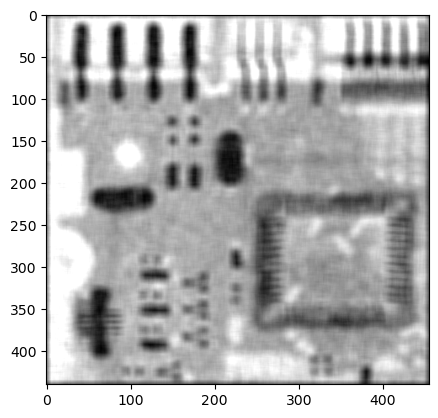

In [34]:
plt.imshow(imgFiltrada, cmap='gray')

Percebe-se que com o padding o filtro é aplicado em toda imagem, portanto corrigindo o problema observado anteriormente. No entanto ainda há uma distorção quando comparado a borda com o restante da imagem, uma vez que os '0' interferirem na média, logo tenderá a ser mais escuro essa região da imagem.